#### Data Stored in tsv (Tab Separated values File )

In [44]:
import pandas as pd
import matplotlib.pyplot as plt


In [15]:
#Use pd.read_csv(fpath, sep='\t') or pd.read_table(fpath)

fpath= 'C:/Users/Parthasarathi/Desktop/JupyterNotebook/OlympicMedal/all_medalists.csv'
medals = pd.read_csv(fpath)

In [16]:
medals.head()

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver


In [17]:
medals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29216 entries, 0 to 29215
Data columns (total 10 columns):
City            29216 non-null object
Edition         29216 non-null int64
Sport           29216 non-null object
Discipline      29216 non-null object
Athlete         29216 non-null object
NOC             29216 non-null object
Gender          29216 non-null object
Event           29216 non-null object
Event_gender    29216 non-null object
Medal           29216 non-null object
dtypes: int64(1), object(9)
memory usage: 2.2+ MB


### Grouping and aggregating
The Olympic medal data for the following exercises comes from The Guardian. It comprises records of all events held at the Olympic games between 1896 and 2012.

Suppose you have loaded the data into a DataFrame medals. You now want to find the total number of medals awarded to the USA per edition. To do this, filter the 'USA' rows and use the groupby() function to put the 'Edition' column on the index:

USA_edition_grouped = medals.loc[medals.NOC == 'USA'].groupby('Edition')
Given the goal of finding the total number of USA medals awarded per edition, what column should you select and which aggregation method should you use?


In [18]:
medals.columns

Index(['City', 'Edition', 'Sport', 'Discipline', 'Athlete', 'NOC', 'Gender',
       'Event', 'Event_gender', 'Medal'],
      dtype='object')

In [19]:
medals.loc[medals.NOC=='USA'].groupby('Edition')['Medal'].count()

Edition
1896     20
1900     55
1904    394
1908     63
1912    101
1920    193
1924    198
1928     84
1932    181
1936     92
1948    148
1952    130
1956    118
1960    112
1964    150
1968    149
1972    155
1976    155
1984    333
1988    193
1992    224
1996    260
2000    248
2004    264
2008    315
Name: Medal, dtype: int64

In [20]:
# Select the 'NOC' column of medals: country_names
country_names = medals.NOC

# Count the number of medals won by each country: medal_counts
medal_counts = country_names.value_counts()

# Print top 15 countries ranked by medals
print(medal_counts.head(15))

USA    4335
URS    2049
GBR    1594
FRA    1314
ITA    1228
GER    1211
AUS    1075
HUN    1053
SWE    1021
GDR     825
NED     782
JPN     704
CHN     679
RUS     638
ROU     624
Name: NOC, dtype: int64


In [21]:
# Construct the pivot table: counted
counted = medals.pivot_table(index='NOC', columns='Medal',values='Athlete',aggfunc='count')

# Create the new column: counted['totals']
counted['totals'] = counted.sum(axis='columns')

# Sort counted by the 'totals' column
counted = counted.sort_values('totals',ascending=False)

# Print the top 15 rows of counted
print(counted.head(15))

Medal  Bronze    Gold  Silver  totals
NOC                                  
USA    1052.0  2088.0  1195.0  4335.0
URS     584.0   838.0   627.0  2049.0
GBR     505.0   498.0   591.0  1594.0
FRA     475.0   378.0   461.0  1314.0
ITA     374.0   460.0   394.0  1228.0
GER     454.0   407.0   350.0  1211.0
AUS     413.0   293.0   369.0  1075.0
HUN     345.0   400.0   308.0  1053.0
SWE     325.0   347.0   349.0  1021.0
GDR     225.0   329.0   271.0   825.0
NED     320.0   212.0   250.0   782.0
JPN     270.0   206.0   228.0   704.0
CHN     193.0   234.0   252.0   679.0
RUS     240.0   192.0   206.0   638.0
ROU     282.0   155.0   187.0   624.0


In [26]:
counted.sum(axis='rows')

Medal
Bronze     9689.0
Gold       9850.0
Silver     9677.0
totals    29216.0
dtype: float64

Applying .drop_duplicates()
#### What could be the difference between the 'Event_gender' and 'Gender' columns?
You should be able to evaluate your guess by looking at the unique values of the pairs (Event_gender, Gender) in the data. In particular, you should not see something like (Event_gender='M', Gender='Women'). However, you will see that, strangely enough, there is an observation with (Event_gender='W', Gender='Men').

The duplicates can be dropped using the .drop_duplicates() method, leaving behind the unique observations. The DataFrame has been loaded as medals.

In [27]:
# Select columns: ev_gen
ev_gen = medals[['Event_gender','Gender']]

# Drop duplicate pairs: ev_gen_uniques
ev_gen_uniques = ev_gen.drop_duplicates()

# Print ev_gen_uniques
print(ev_gen_uniques)

      Event_gender Gender
0                M    Men
348              X    Men
416              W  Women
639              X  Women
23675            W    Men


In [29]:
# Group medals by the two columns: medals_by_gender
medals_by_gender = medals.groupby(['Event_gender','Gender'])

# Create a DataFrame with a group count: medal_count_by_gender
medal_count_by_gender = medals_by_gender.count()

# Print medal_count_by_gender
print(medal_count_by_gender)

# only 1 suspicious row

                      City  Edition  Sport  Discipline  Athlete    NOC  Event  \
Event_gender Gender                                                             
M            Men     20067    20067  20067       20067    20067  20067  20067   
W            Men         1        1      1           1        1      1      1   
             Women    7277     7277   7277        7277     7277   7277   7277   
X            Men      1653     1653   1653        1653     1653   1653   1653   
             Women     218      218    218         218      218    218    218   

                     Medal  
Event_gender Gender         
M            Men     20067  
W            Men         1  
             Women    7277  
X            Men      1653  
             Women     218  


In [30]:
# Create the Boolean Series: sus
sus = (medals.Event_gender == 'W') &(medals.Gender == 'Men')

# Create a DataFrame with the suspicious row: suspect
suspect = medals.loc[sus]

# Print suspect
print(suspect)

         City  Edition      Sport Discipline            Athlete  NOC Gender  \
23675  Sydney     2000  Athletics  Athletics  CHEPCHUMBA, Joyce  KEN    Men   

          Event Event_gender   Medal  
23675  marathon            W  Bronze  


## Country Ranking

In [36]:
medals['Sport'].unique() # 42 sports

array(['Aquatics', 'Athletics', 'Cycling', 'Fencing', 'Gymnastics',
       'Shooting', 'Tennis', 'Weightlifting', 'Wrestling', 'Archery',
       'Basque Pelota', 'Cricket', 'Croquet', 'Equestrian', 'Football',
       'Golf', 'Polo', 'Rowing', 'Rugby', 'Sailing', 'Tug of War',
       'Boxing', 'Lacrosse', 'Roque', 'Hockey', 'Jeu de paume', 'Rackets',
       'Skating', 'Water Motorsports', 'Modern Pentathlon', 'Ice Hockey',
       'Basketball', 'Canoe / Kayak', 'Handball', 'Judo', 'Volleyball',
       'Table Tennis', 'Badminton', 'Baseball', 'Softball', 'Taekwondo',
       'Triathlon'], dtype=object)

In [38]:
# Group medals by 'NOC': country_grouped
country_grouped = medals.groupby('NOC')

# Compute the number of distinct sports in which each country won medals: Nsports
Nsports = country_grouped.Sport.nunique()

# Sort the values of Nsports in descending order
Nsports = Nsports.sort_values(ascending=False)

# Print the top 15 rows of Nsports
print(Nsports.head(15))

NOC
USA    34
GBR    31
FRA    28
GER    26
CHN    24
AUS    22
ESP    22
CAN    22
SWE    21
URS    21
ITA    21
NED    20
RUS    20
JPN    20
DEN    19
Name: Sport, dtype: int64


## Counting USA vs. USSR Cold War Olympic Sports
The Olympic competitions between 1952 and 1988 took place during the height of the Cold War between the United States of America (USA) & the Union of Soviet Socialist Republics (USSR). Your goal in this exercise is to aggregate the number of distinct sports in which the USA and the USSR won medals during the Cold War years.

The construction is mostly the same as in the preceding exercise. There is an additional filtering stage beforehand in which you reduce the original DataFrame medals by extracting data from the Cold War period that applies only to the US or to the USSR. The relevant country codes in the DataFrame, which has been pre-loaded as medals, are 'USA' & 'URS'.

In [40]:
# Create a Boolean Series that is True when 'Edition' is between 1952 and 1988: during_cold_war
during_cold_war = (medals.Edition >= 1952) & (medals.Edition <= 1988)

# Extract rows for which 'NOC' is either 'USA' or 'URS': is_usa_urs
is_usa_urs = medals.NOC.isin(['USA','URS'])

# Use during_cold_war and is_usa_urs to create the DataFrame: cold_war_medals
cold_war_medals = medals.loc[is_usa_urs & during_cold_war]

# Group cold_war_medals by 'NOC'
country_grouped = cold_war_medals.groupby('NOC')

# Create Nsports (Medals wons in number of sports)
Nsports = country_grouped.Sport.nunique().sort_values(ascending=False)

# Print Nsports
print(Nsports)


NOC
URS    21
USA    20
Name: Sport, dtype: int64


## Counting USA vs. USSR Cold War Olympic Medals
For this exercise, you want to see which country, the USA or the USSR, won the most medals consistently over the Cold War period.

In [41]:
# Create the pivot table: medals_won_by_country
medals_won_by_country = medals.pivot_table(index='Edition',columns='NOC',values='Athlete', aggfunc='count')

# Slice medals_won_by_country: cold_war_usa_urs_medals
cold_war_usa_urs_medals = medals_won_by_country.loc[1952:1988, ['USA','URS']]

# Create most_medals 
most_medals = cold_war_usa_urs_medals.idxmax(axis='columns')

# Print most_medals.value_counts()
print(most_medals.value_counts())

URS    8
USA    2
dtype: int64


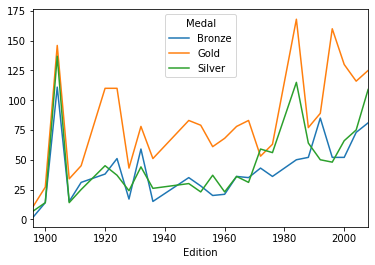

In [45]:
# Create the DataFrame: usa
usa = medals[medals.NOC=='USA']

# Group usa by ['Edition', 'Medal'] and aggregate over 'Athlete'
usa_medals_by_year = usa.groupby(['Edition', 'Medal'])['Athlete'].agg('count')

# Reshape usa_medals_by_year by unstacking
usa_medals_by_year = usa_medals_by_year.unstack(level=1)

# Plot the DataFrame usa_medals_by_year
usa_medals_by_year.plot()
plt.show()

## Visualizing USA Medal Counts by Edition: Area Plot

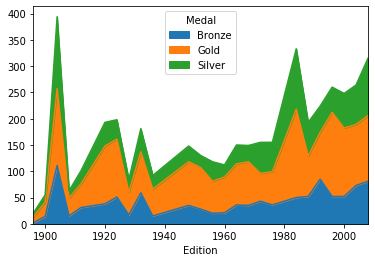

In [46]:
# Create an area plot of usa_medals_by_year
usa_medals_by_year.plot.area()
plt.show()

### Visualizing USA Medal Counts by Edition: Area Plot with Ordered Medals